In [2]:
print("Merhaba, İGÜ - YAPAY ZEKA geliştirilmesi için kullanılacak kütüphaneler - D3") # print ekrana çıktı veren bir koddur.


Merhaba, İGÜ - YAPAY ZEKA geliştirilmesi için kullanılacak kütüphaneler - D3


In [3]:
import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [4]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

os.chdir('/content/drive/My Drive/YAPAY_ZEKA_DERSI')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.


/content/drive/My Drive/YAPAY_ZEKA_DERSI


In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# California Housing veri setini yükleme
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)  # feature = tablodaki değişken isimleri
df['PRICE'] = housing.target

# Özellikler ve hedef değişkeni ayırma
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Veri setini bölme

# test_size 0.3 = 100 de 30'a böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model oluşturma

model = LinearRegression()   # Model oluşturan uygulama
model.fit(X_train, y_train)

# Tahmin yapma
predictions = model.predict(X_test)  # Modelin tahmini yapılır
print("Tahmin Sonucları: ", predictions[:5])
print("Gerçek Değerler: ", y_test[:5].values)

# Sistemin Ortalama Hatası (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) Sonucu:", mse)

# Sistemin R-kare Hatası (R²)
r2 = r2_score(y_test, predictions)
print("R-squared (R²) Sonucu:", r2)


Tahmin Sonucları:  [0.72604907 1.76743383 2.71092161 2.83514727 2.60695807]
Gerçek Değerler:  [0.477   0.458   5.00001 2.186   2.78   ]
Mean Squared Error (MSE) Sonucu: 0.5305677824766758
R-squared (R²) Sonucu: 0.595770232606166


In [9]:
# TensorFlow kütüphanesinin sisteme dahil edilmesi ve veri setinin işleme alınması
# TensorFlow açık kaynaklı makine öğrenim kütüphanesidir
# TensorFlow = yapay zeka uygulamaları, görüntü işleme, doğal dil işleme ve daha birçok alanda yaygın olarak kullanılmaktadır.

!pip install pydot
!apt-get install graphviz
!pip install tensorflow

# Bu iki kütüphane ile oluşturulan yapay zeka modelinin yapısını çıktı alabileceğiz.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [10]:
#TensorFlow kütüphanesi:
!pip install tensorflow

!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models # layers = katman
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data() # MNIST veri setini yükleme / Görüntü yapay zeka sistemi
x_train, x_test = x_train / 255.0, x_test / 255.0
!pwd

/content/drive/MyDrive/YAPAY_ZEKA_DERSI


In [32]:
# sparse_categorical_crossentropy = Çoklu sınıflandırma problemlerinde kullanılır
# binary_crossentropy = İkili sınıflandırma problemlerinde kullanılır

model = models.Sequential([ # Modeli oluşturma
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),  # activation = bilgisayarın anlamasını kolaylaştırır / renk örneği
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax') # "Dense" dikkat edilmesi gereken kısım
])


In [33]:
model.compile(optimizer='adam', # Modeli derleme
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0650
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0579
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9838 - loss: 0.0499
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0439
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9859 - loss: 0.0421


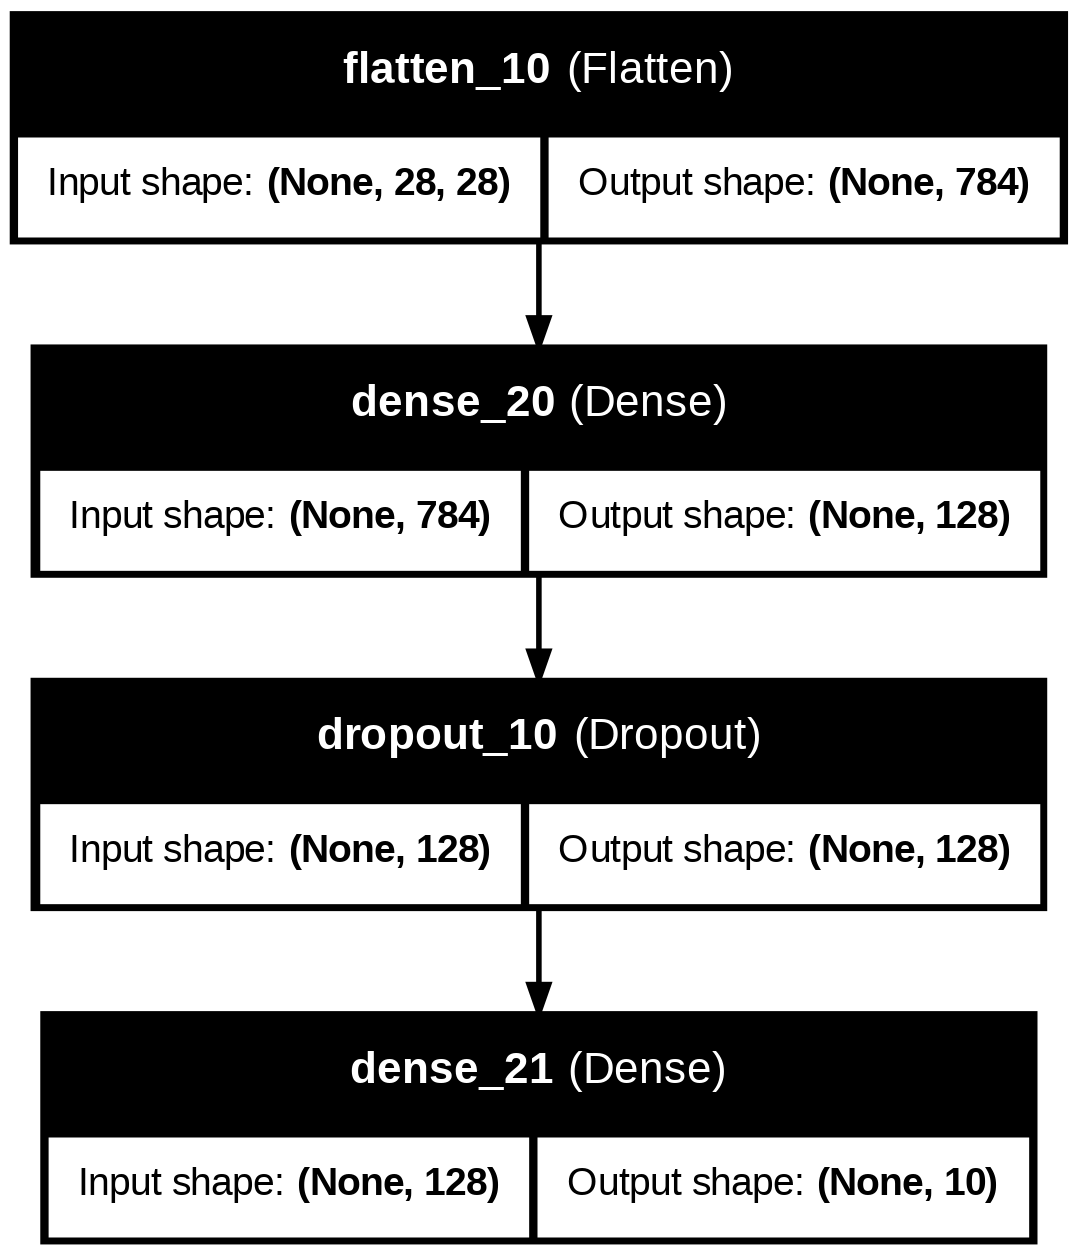

In [37]:
model.fit(x_train, y_train, epochs=5) # Modeli Eğitilmesi Adımı

# Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanımı
plot_model(model, to_file='YZ_Model/yz_tensoflow_model_ciktisi.png', show_shapes=True, show_layer_names=True) # Modelin Çıktısı


In [38]:
# Test seti üzerinde modelin performansını değerlendirme

hata_oranı, basarı_oranı = model.evaluate(x_test, y_test, verbose=2)

print(" Modelin Doğruluk Oranı: %", basarı_oranı*100)
print(" Modelin Hata Oranı: %", hata_oranı*100)

313/313 - 1s - 2ms/step - accuracy: 0.9808 - loss: 0.0702
 Modelin Doğruluk Oranı: % 98.07999730110168
 Modelin Hata Oranı: % 7.019725441932678


In [39]:
# PyTorch kütüphanesi:
!pip install torch torchvision torchaudio

Epoch 1, Loss: 0.7417437479789577, Accuracy: 82.07666666666667%
Epoch 2, Loss: 0.36444527304757124, Accuracy: 89.66%
Epoch 3, Loss: 0.3193271743542731, Accuracy: 90.78%
Epoch 4, Loss: 0.293165230619183, Accuracy: 91.57333333333334%
Epoch 5, Loss: 0.2734613184735719, Accuracy: 92.12166666666667%
Epoch 6, Loss: 0.25491872844077756, Accuracy: 92.70666666666666%
Epoch 7, Loss: 0.23844158632764176, Accuracy: 93.22166666666666%
Epoch 8, Loss: 0.22288745122232925, Accuracy: 93.72%
Epoch 9, Loss: 0.20889641236521797, Accuracy: 94.075%
Epoch 10, Loss: 0.19617887460457872, Accuracy: 94.48333333333333%
Epoch 11, Loss: 0.18505825009792726, Accuracy: 94.805%
Epoch 12, Loss: 0.17459182413831068, Accuracy: 95.005%
Epoch 13, Loss: 0.16572699648564432, Accuracy: 95.31%
Epoch 14, Loss: 0.15747211791320778, Accuracy: 95.58%
Epoch 15, Loss: 0.15002592849626598, Accuracy: 95.71666666666667%
Epoch 16, Loss: 0.14304092668616442, Accuracy: 96.0%
Epoch 17, Loss: 0.13705012050947782, Accuracy: 96.18%
Epoch 18, 

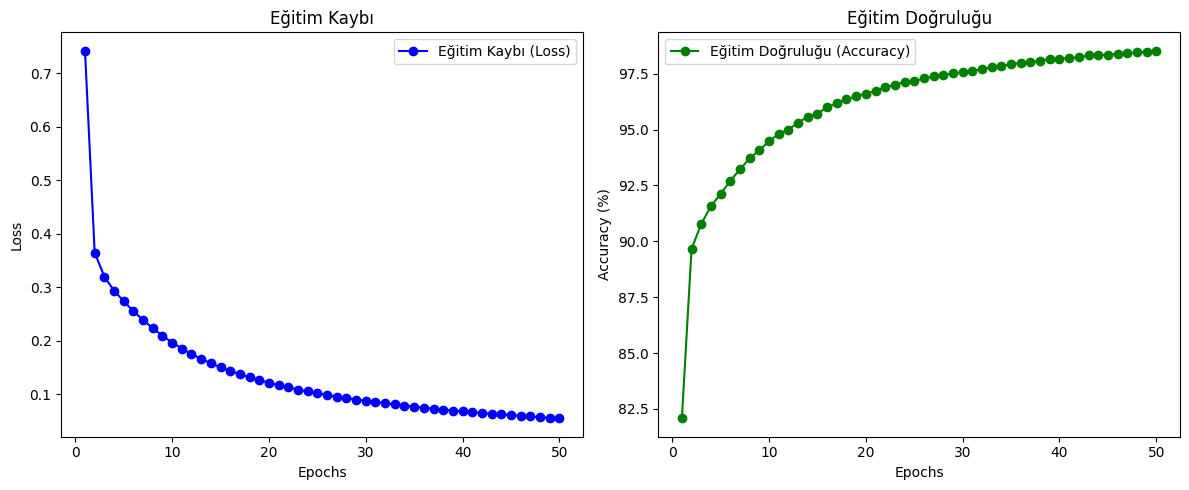

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Modeli oluşturma
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Eğitim için boş listeler tanımla
train_losses = []
train_accuracies = []

# Eğitme döngüsü
for epoch in range(50):  # 50 epoch boyunca eğit
    running_loss = 0.0
    correct = 0  # toplam geçen zamanı alabilmek için olan terim
    total = 0    # toplam geçen zamanı alabilmek için olan terim

    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Kayıp (loss) değerini topla
        running_loss += loss.item()

        # Doğruluğu hesapla
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Her epoch sonunda ortalama kayıp ve doğruluk
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')

print('Eğitim tamamlandı!')

# Eğitim sonuçlarını grafikle göster
epochs = range(1, 51)  # 50 epoch olduğu için 1'den 51'ya kadar olan epoch'lar
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Eğitim Kaybı (Loss)')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'go-', label='Eğitim Doğruluğu (Accuracy)')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
# Test verisi üzerinde modelin performansını değerlendirme
test_loss = 0.0
correct = 0
total = 0

# Test verisi üzerinde modelin kaybını ve doğruluğunu hesapla (gradyan hesaplama yok)
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        loss = criterion(output, labels)
        test_loss += loss.item()

        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Test seti kaybı ve doğruluğu
test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

print("Test Seti Kaybı: ", test_loss)
print("Test Seti Doğruluğu: ", test_accuracy , "%")

Test Seti Kaybı:  0.08210872992269612
Test Seti Doğruluğu:  97.53 %


In [43]:
# Keras kütüphanesi:
!pip install keras

In [45]:
# KERAS KULLANIMI / HATALI

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modeli oluşturma
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitme
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 28, 28), dtype=float32). Expected shape (None, 784), but input has incompatible shape (32, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28), dtype=float32)
  • training=True
  • mask=None